We revised our approach to demonstrating convergence. Thanks to Becca Cohen for the suggestion.   
In the experiment, we analyzed the results of simulations with varying numbers of iterations while fixing the Pokémon and Poké Ball types.  
For each Pokémon and Poké Ball pair, we plotted Average Turns, Success Rate, and the Standard Error of Average Turns across different simulation counts.  

By observing the fluctuations in Average Turns and Success Rate, we found that their values stabilized as the number of simulations increased.  
Similarly, the reduction in Standard Error indicates that the results from a larger number of simulations become more consistent compared to those from fewer simulations.

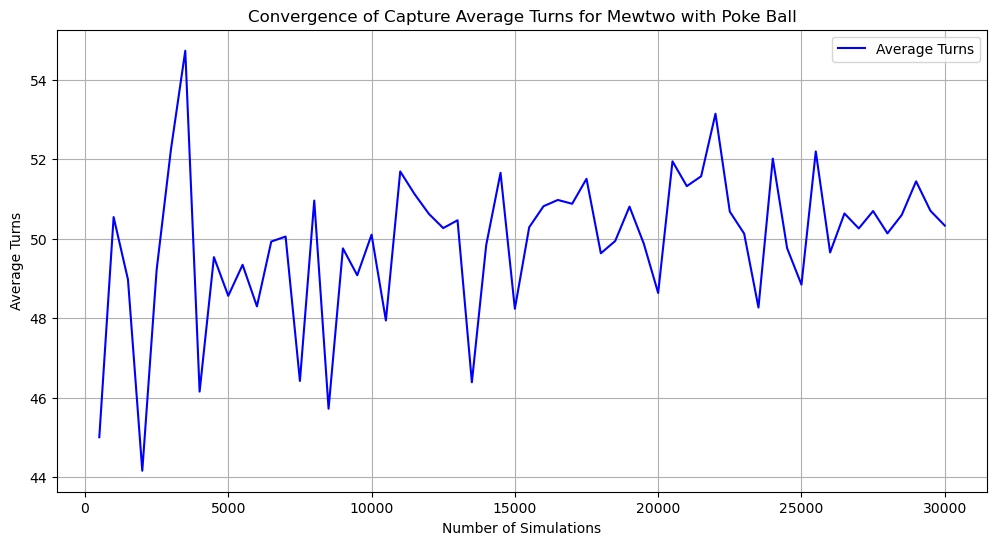

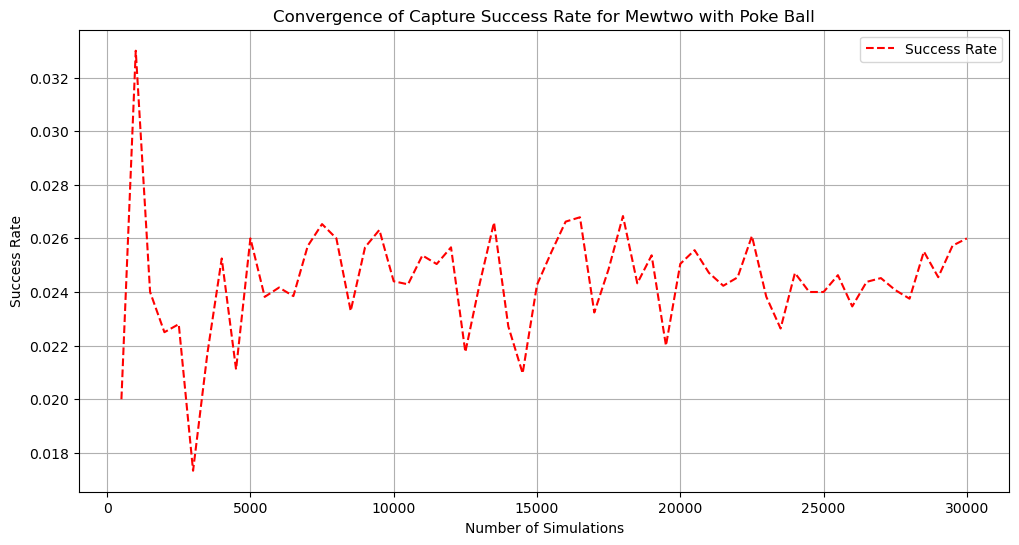

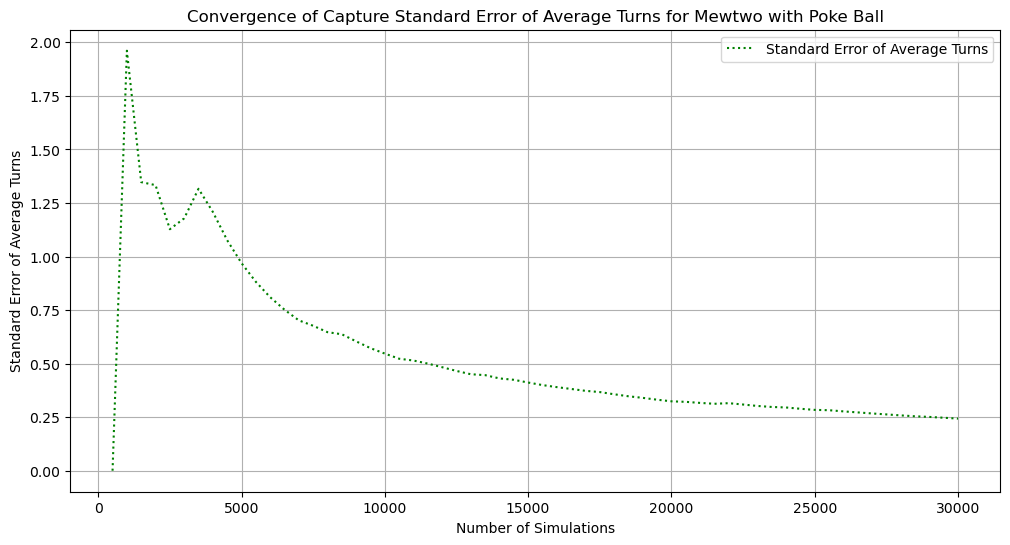

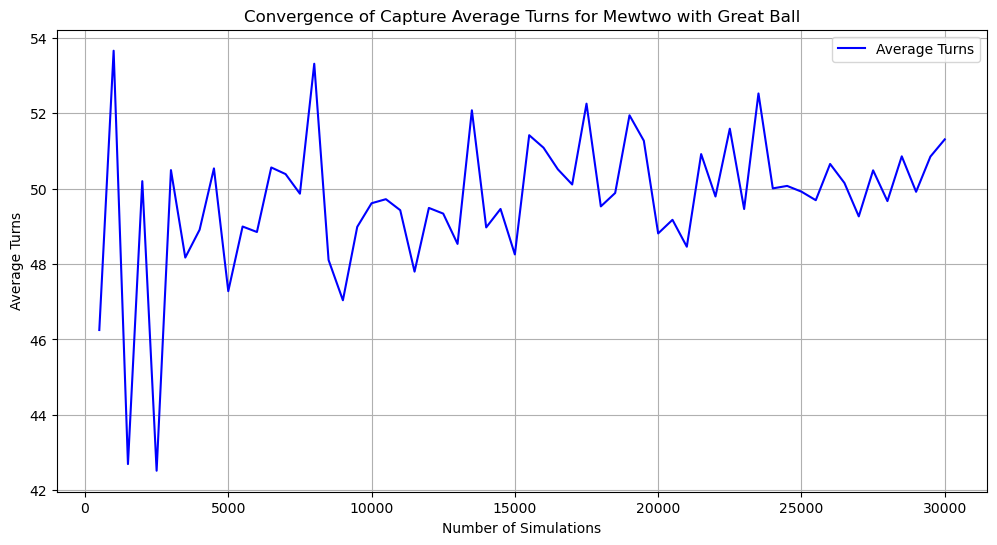

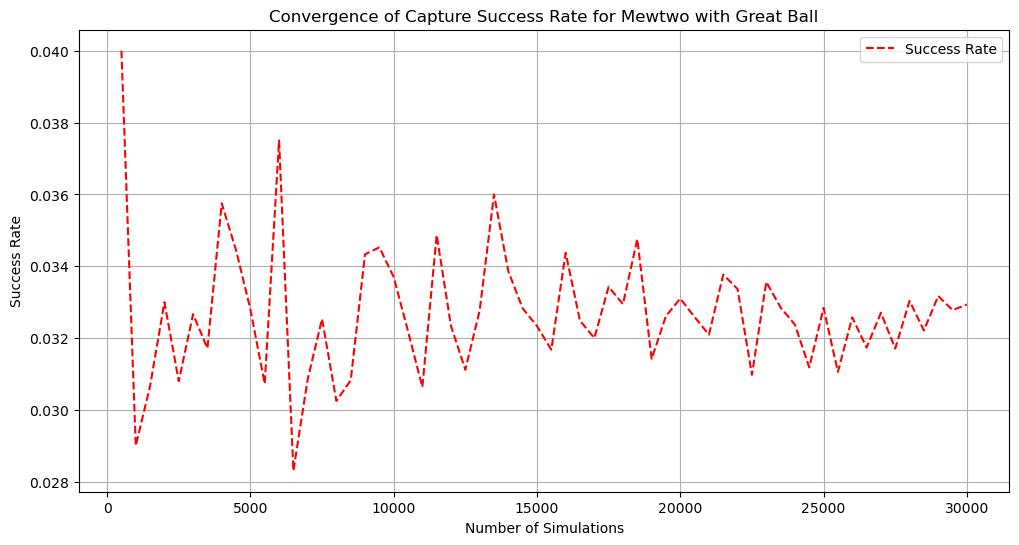

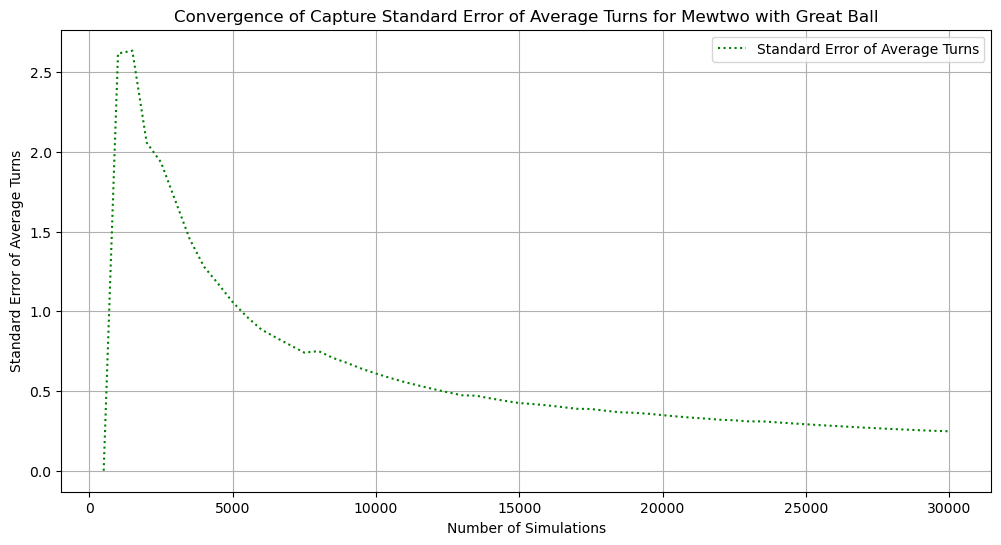

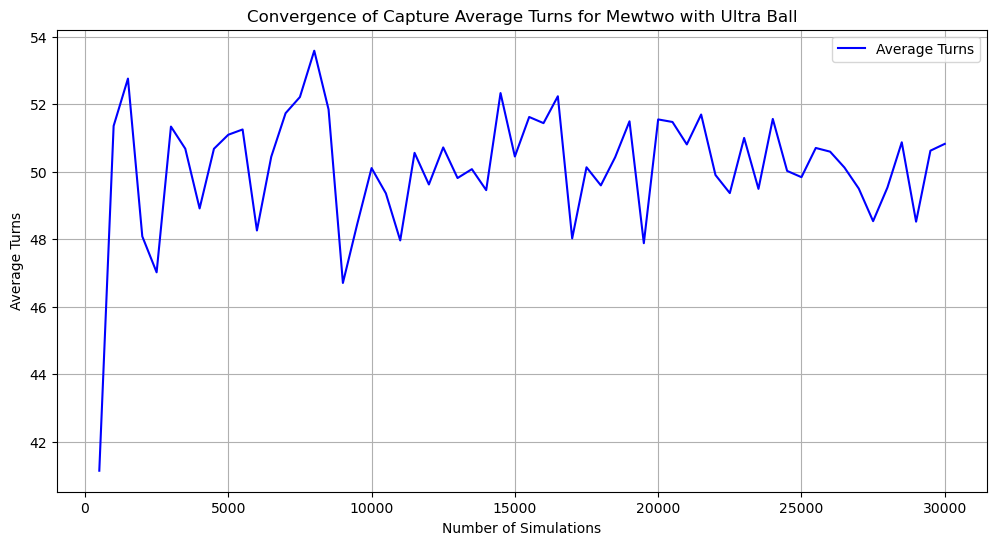

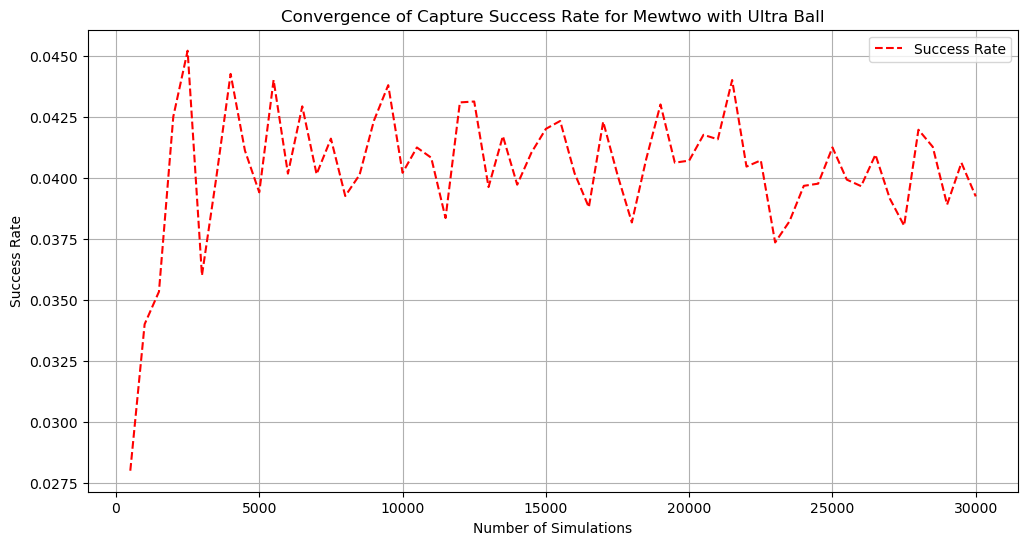

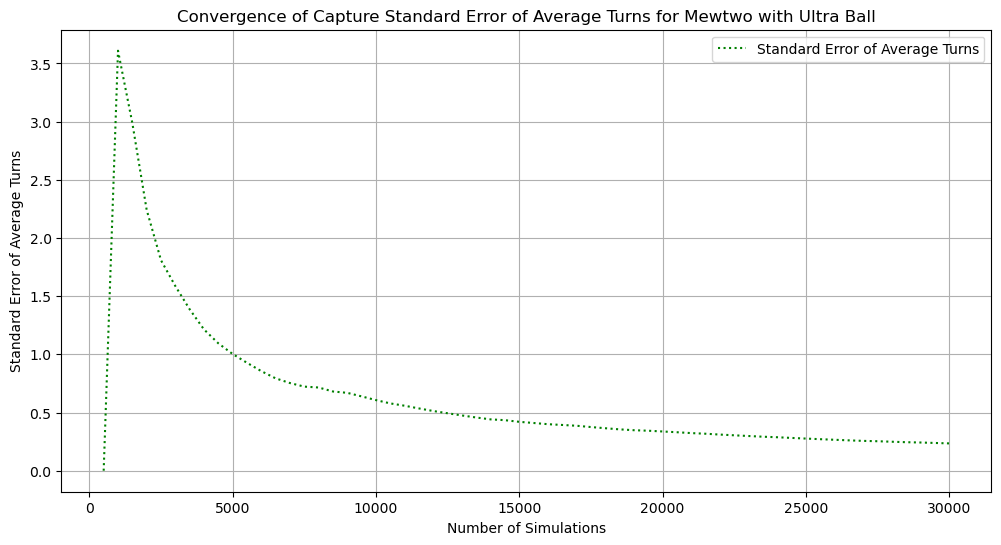

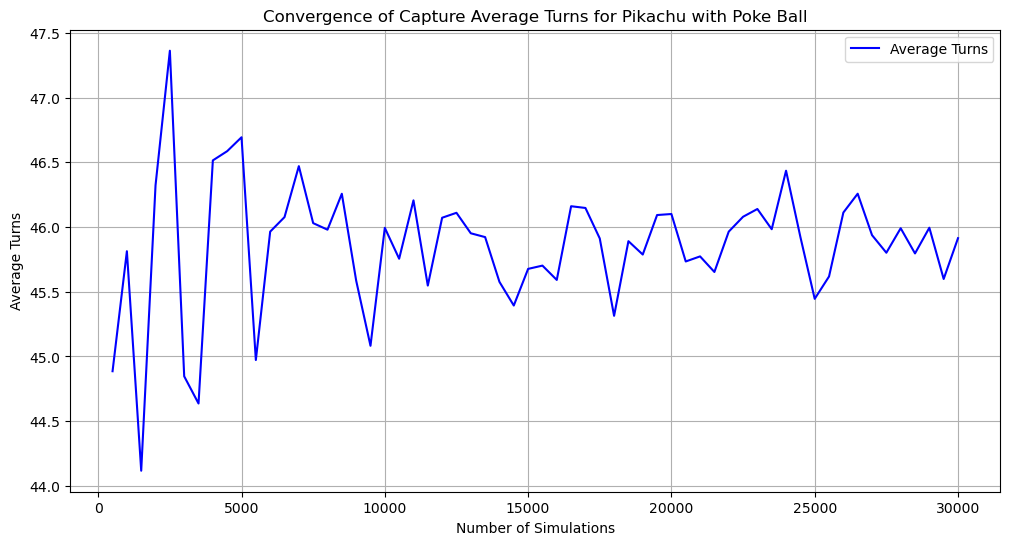

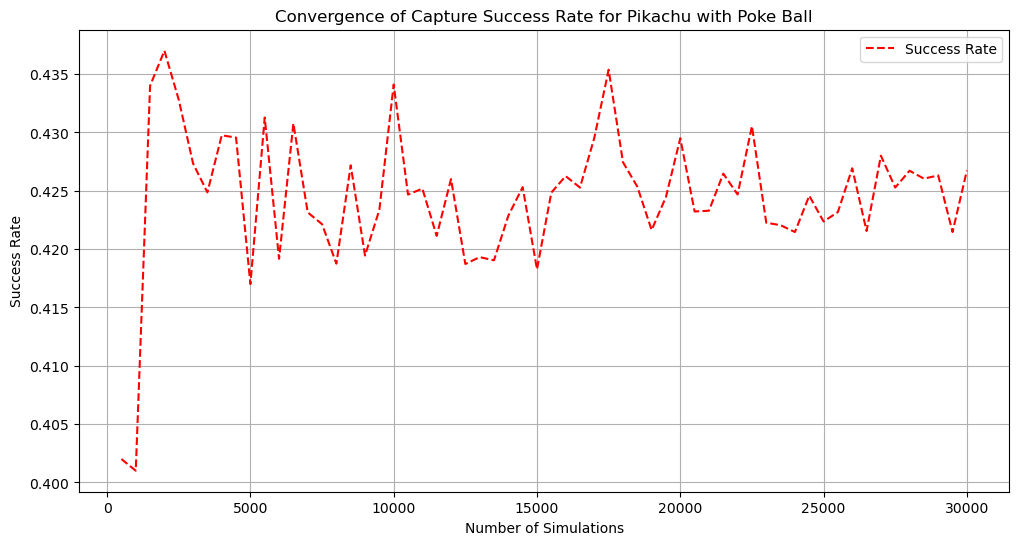

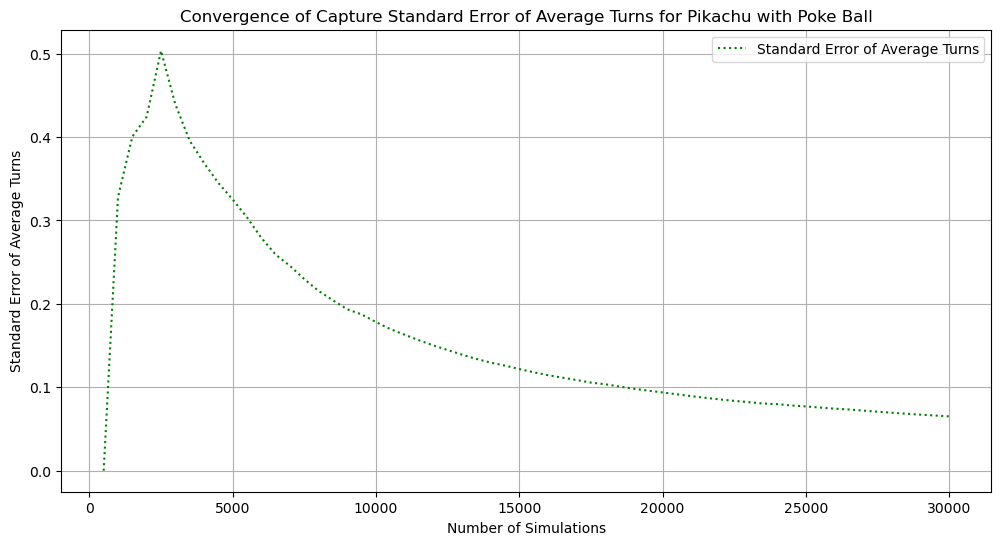

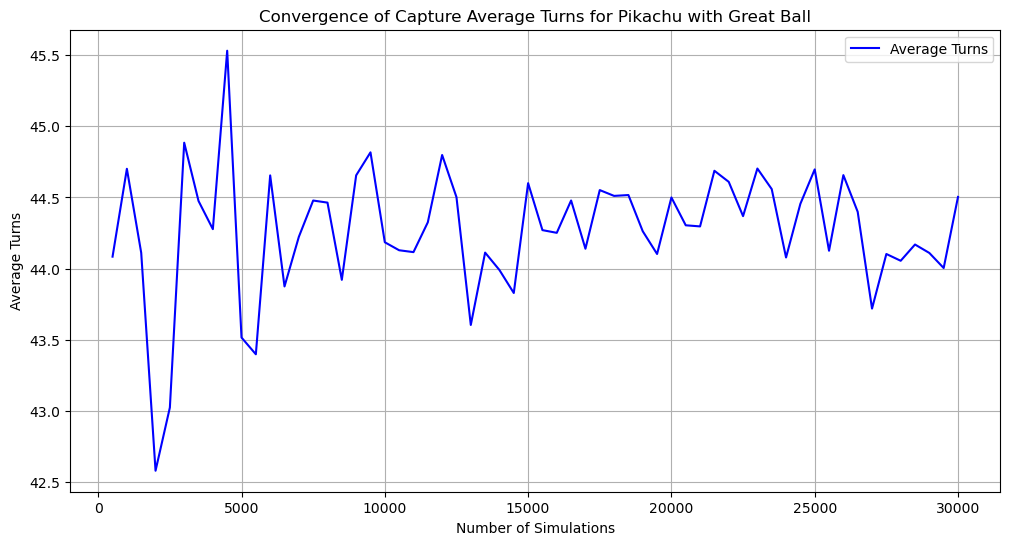

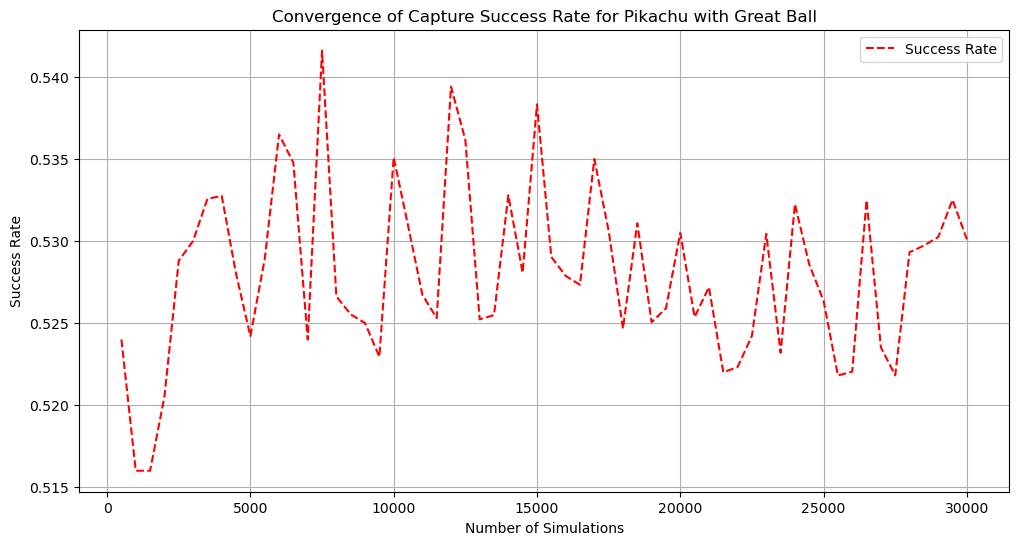

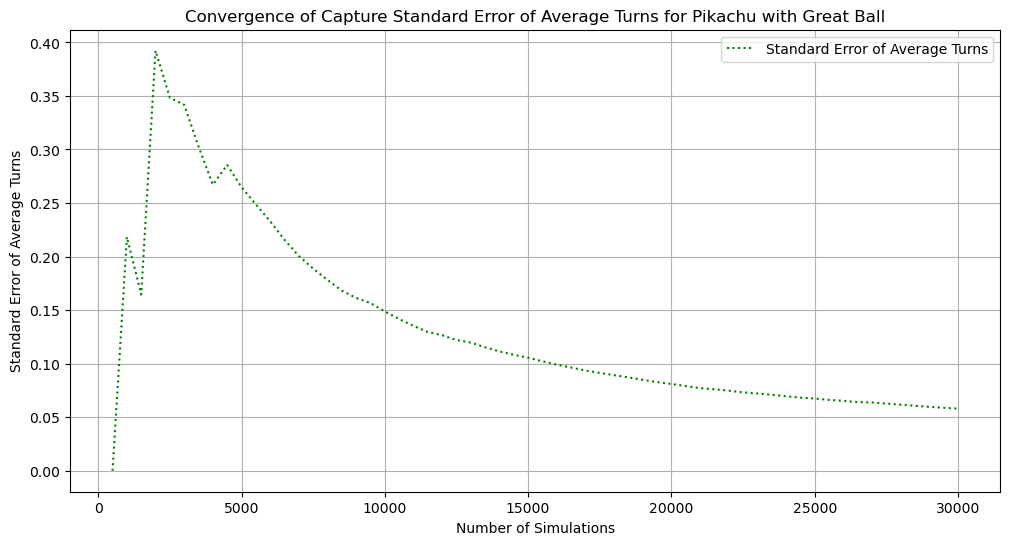

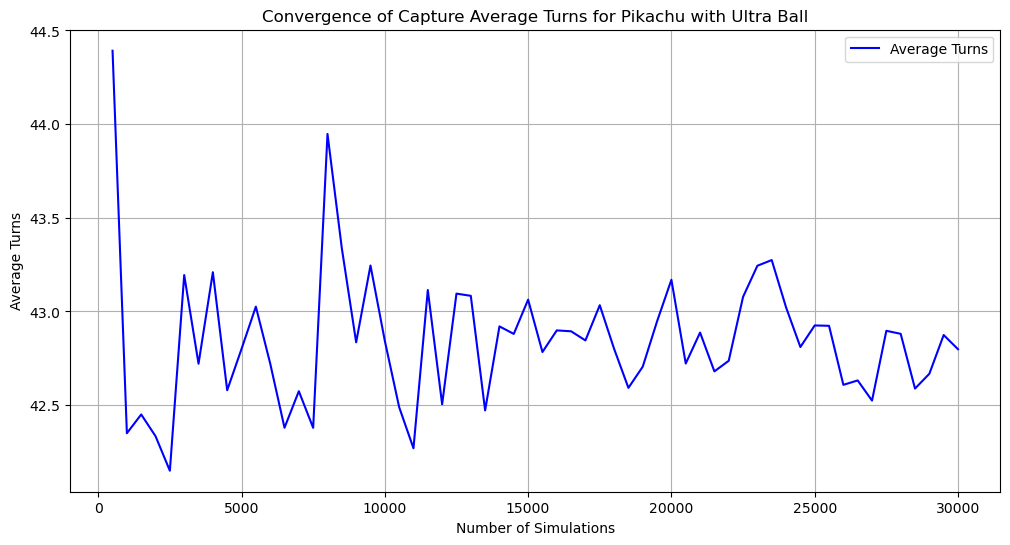

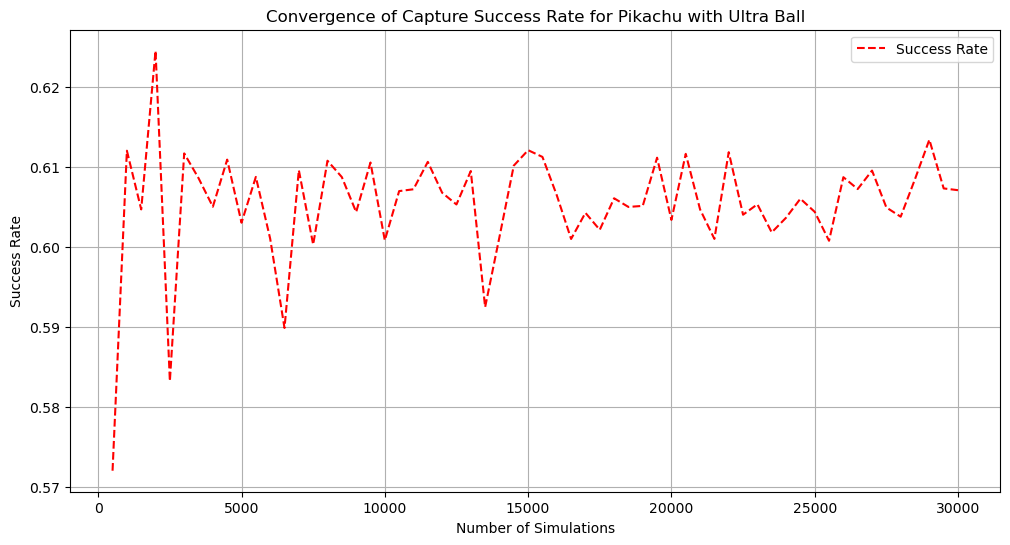

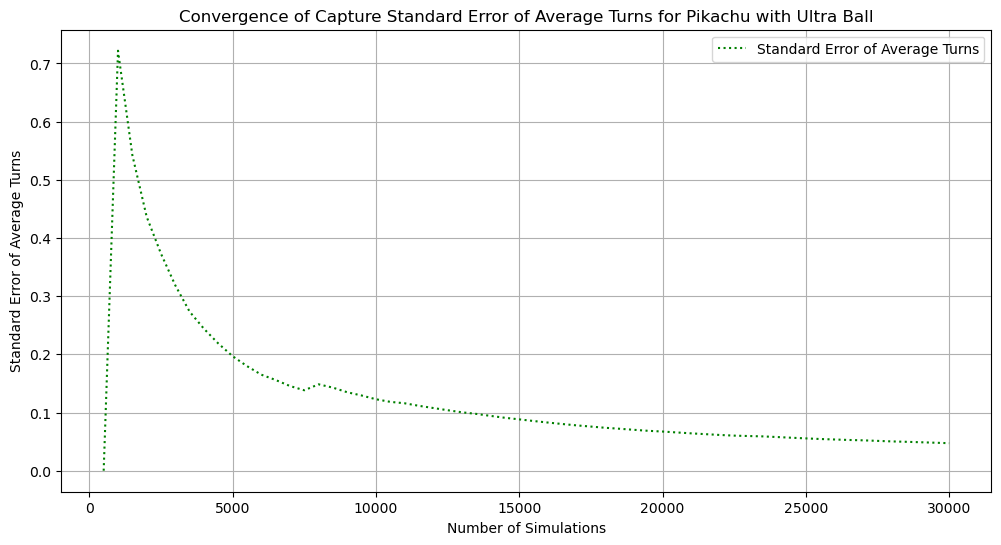

In [4]:
from function import *
from init import *

import numpy as np

def simulate_capture_convergence(pokemon, pokeball, max_simulations=30000, step_size=500):
    '''
    Show the convergence of the results of the Monte Carlo simulations.
    :param pokemon: The pokemon being simulated.
    :param pokeball: The pokeball being used to capture.
    :param max_simulations: Max number of simulations.
    :param step_size: Step size of the simulations.
    :return: None.
    
    >>> simulate_capture_convergence(pokemon_list[0], pokeballs[0], max_simulations=1000, step_size=200)
    This should plot the convergence of average turns, success rate, and standard error for capturing Mewtwo.

    '''
    
    # Initialize
    num_steps = max_simulations // step_size
    avg_turns_history = np.zeros(num_steps)
    success_rate_history = np.zeros(num_steps)
    standard_error_history = np.zeros(num_steps)
    
    # Simulate over increasing numbers of simulations
    for idx, num_simulations in enumerate(range(step_size, max_simulations + 1, step_size)):
        success_rate, avg_turns, _ = simulate_capture(pokemon, pokeball, num_simulations)
        
        success_rate_history[idx] = success_rate
        avg_turns_history[idx] = avg_turns
        standard_error_history[idx] = np.std(avg_turns_history[:idx+1]) / np.sqrt(idx + 1)
    
    def plot_convergence(item, label, color, linestyle):
        '''
        Helper function to plot the convergence.
        :param item: Data to plot (average turns, success rate, standard error).
        :param label: Label of y-axis.
        :param color: Color of the line.
        :param linestyle: Style of the line.
        :return: None.
        '''
        plt.figure(figsize=(12, 6))
        plt.plot(range(step_size, max_simulations + 1, step_size), item, label=label, color=color, linestyle=linestyle)
        plt.xlabel("Number of Simulations")
        plt.ylabel(label)
        plt.title(f"Convergence of Capture {label} for {pokemon.name} with {pokeball.name}")
        plt.legend()
        plt.grid(True)
        plt.show()
    
    # Plot convergence
    # Convergence of average turns used to capture a pokemon
    plot_convergence(item = avg_turns_history, label="Average Turns", color = "blue", linestyle="solid")
    # Convergence of success rate of capturing a pokemon
    plot_convergence(success_rate_history, label="Success Rate", color = "red", linestyle="--")
    # Convergence of standard error of "Average Turns"
    plot_convergence(standard_error_history, label="Standard Error of Average Turns", color = "green", linestyle=":")

# Run the convergence simulations
for pokemon in pokemon_list[:2]:  # Mewtwo and Pikachu
    for pokeball in pokeballs[:3]:  # Poke, Great, Ultra Ball
        simulate_capture_convergence(pokemon, pokeball)